## 라이브러리 import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

## 데이터 로드

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 확인

In [4]:
labels = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

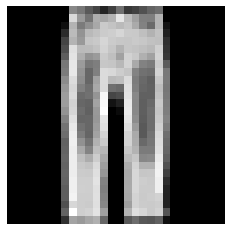

trouser
[[  0   0   0   0   0   0   0   0 136 119  89  68  36  64 113  57  65  82
   99 109   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 218 153 115 173 166 180 230 187 160 127
  126 180   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  15 180 123 145 168 202 195 186 195 170 130
  106 180  18   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  43 187 148 185 193 203 206 214 202 201 191
  178 193  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  68 180 153 197 201 214 203 199 198 202 199
  193 191  47   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  78 223 186 187 194 211 198 178 198 195 191
  185 207  51   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  93 228 174 148 155 202 191 161 210 201 176
  161 212  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 119 231 155 119 126 199 197 184 212 169 130
  123 203  92   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 123 232 147 102 128 219 21

In [5]:
# 임의의 데이터 확인
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.axis('off')
plt.show()
print(labels[Y_train[my_sample]])
print(X_train[my_sample])

## 데이터 전처리

### one-hot encoding

In [6]:
# np_utils.to_categorical()을 사용해 one-hot encoding
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### reshape, scaling

In [7]:
# minmax scaling
x_train = X_train / 255
x_test = X_test / 255
# CNN에 전달하기 위해 reshape로 차원 추가
# 각 이미지(28 * 28)별 요소들을 리스트로 묶음
# ex) [0, 1, 2] -> [[0], [1], [2]]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


기존에 reshape해 60000 * 784로 전해준 것과 달리 이미지의 모양이 그대로 남아있기 때문에 위치 정보를 전달해줄 수 있음

## 모델 생성

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), # 필터의 개수와 크기
                 padding='same', # 입력과 출력의 크기를 같게 padding 설정
                 activation='relu',
                 input_shape=(28, 28, 1) # 단채널 이미지이므로 맨 끝이 1
))

# 파라미터 수를 줄이며 특성을 더 도드라지게
model.add(MaxPool2D(padding='same', # 남은 셀의 크기가 필터의 크기보다 작을 경우 버릴지 0을 씌울지 설정
                    pool_size=(2, 2))) 

# 각각의 이미지별 필터가 만들어짐(32, 3, 3)
# 필터링 후 한장으로 만듦
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
model.add(Flatten()) # 데이터 차원을 1차원으로 맞춰줌
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

## 모델 학습

In [48]:
fit_hist = model.fit(x_train, y_train, batch_size=256, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 2s 9ms/step - loss: 0.7685 - accuracy: 0.7210 - val_loss: 0.4382 - val_accuracy: 0.8427
Epoch 2/20
188/188 [==============================] - 1s 7ms/step - loss: 0.4269 - accuracy: 0.8495 - val_loss: 0.3537 - val_accuracy: 0.8697
Epoch 3/20
188/188 [==============================] - 1s 7ms/step - loss: 0.3676 - accuracy: 0.8686 - val_loss: 0.3135 - val_accuracy: 0.8841
Epoch 4/20
188/188 [==============================] - 1s 7ms/step - loss: 0.3256 - accuracy: 0.8850 - val_loss: 0.2869 - val_accuracy: 0.8924
Epoch 5/20
188/188 [==============================] - 1s 7ms/step - loss: 0.3012 - accuracy: 0.8904 - val_loss: 0.2819 - val_accuracy: 0.8986
Epoch 6/20
188/188 [==============================] - 1s 7ms/step - loss: 0.2782 - accuracy: 0.8986 - val_loss: 0.2655 - val_accuracy: 0.9000
Epoch 7/20
188/188 [==============================] - 1s 7ms/step - loss: 0.2645 - accuracy: 0.9035 - val_loss: 0.2549 - val_accuracy: 0.9058
Epoch 

## 학습 결과 확인

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.9175999760627747


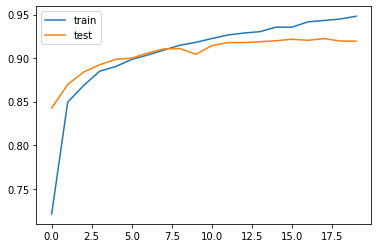

In [50]:
# train, test accuracy 확인
plt.plot(fit_hist.history['accuracy'], label='train')
plt.plot(fit_hist.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.show()

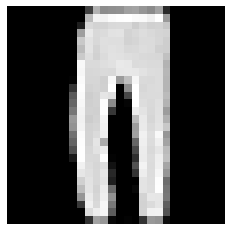

[[1.4385960e-13 1.0000000e+00 5.2343316e-15 6.8276785e-14 2.0735909e-16
  1.2089896e-15 2.1825006e-16 8.3662307e-21 5.2113474e-12 6.2801699e-18]]
1
Target: trouser
Prediction after learning: trouser


In [51]:
# 임의의 행 추출해 모델 확인
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
plt.axis('off')
plt.show()
pred = model.predict(x_test[my_sample].reshape(-1,28,28,1))
print(pred)
print(Y_test[my_sample])
print('Target:', labels[Y_test[my_sample]])
print('Prediction after learning:', labels[np.argmax(pred)])